# Predicting the house prices data set for king county

## Loading graphlab

In [2]:
import graphlab

## Load data and exploring the data

# Load some house sales data

Dataset is from house sales in King County, the region where the city of Seattle, WA is located.

In [3]:
sales = graphlab.SFrame('home_data.gl/')

## exploring the data let's visualize few rows of data with the head()

In [4]:
sales.head(5)

id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront
7129300520,2014-10-13 00:00:00+00:00,221900,3,1,1180,5650,1,0
6414100192,2014-12-09 00:00:00+00:00,538000,3,2.25,2570,7242,2,0
5631500400,2015-02-25 00:00:00+00:00,180000,2,1,770,10000,1,0
2487200875,2014-12-09 00:00:00+00:00,604000,4,3,1960,5000,1,0
1954400510,2015-02-18 00:00:00+00:00,510000,3,2,1680,8080,1,0
view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat
0,3,7,1180,0,1955,0,98178,47.51123398
0,3,7,2170,400,1951,1991,98125,47.72102274
0,3,6,770,0,1933,0,98028,47.73792661
0,5,7,1050,910,1965,0,98136,47.52082


# Exploring the data for housing sales 

The house price is correlated with the number of square feet of living space.

In [5]:
graphlab.canvas.set_target('ipynb')
sales.show(view="Scatter Plot", x="sqft_living", y="price")

# Create a simple regression model of sqft_living to price

Split data into training and testing, for spliting dataset of the at a particuler point we are using seed. So
We set some what seed=123 so that everyone running this notebook gets the same results.  In practice, you may set a random seed (or let GraphLab Create pick a random seed for you).  

In [6]:
train_data,test_data = sales.random_split(.8,seed=123)

## Build the regression model using only sqft_living as a feature and
   -called model as sqft_model and use feature sqft_living

In [7]:
sqft_model = graphlab.linear_regression.create(train_data, target='price', features=['sqft_living'],validation_set=None)

PROGRESS: Linear regression:
PROGRESS: --------------------------------------------------------
PROGRESS: Number of examples          : 17274
PROGRESS: Number of features          : 1
PROGRESS: Number of unpacked features : 1
PROGRESS: Number of coefficients    : 2
PROGRESS: Starting Newton Method
PROGRESS: --------------------------------------------------------
PROGRESS: +-----------+----------+--------------+--------------------+---------------+
PROGRESS: | Iteration | Passes   | Elapsed Time | Training-max_error | Training-rmse |
PROGRESS: +-----------+----------+--------------+--------------------+---------------+
PROGRESS: | 1         | 2        | 1.022077     | 4398047.964356     | 260342.566966 |
PROGRESS: +-----------+----------+--------------+--------------------+---------------+


# Evaluate the simple model

In [8]:
print test_data['price'].mean()

545496.636322


In [9]:
print sqft_model.evaluate(test_data)

{'max_error': 4317602.5969307255, 'rmse': 265878.76321927825}


RMSE of about \$255,170!

# Let's show what our predictions look like

Matplotlib is a Python plotting library that is also useful for plotting. import it for ploting 

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

- plot a graph between the price and sqrt_living
- and a graph between sqrt_living and predict price by the model

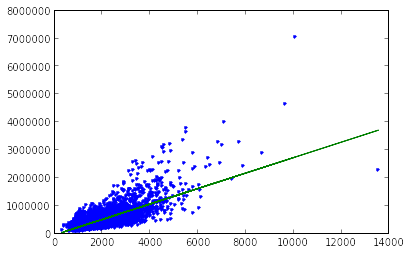

In [11]:
plt.plot(test_data['sqft_living'],test_data['price'],'.',
        test_data['sqft_living'],sqft_model.predict(test_data),'-')

Above:  blue dots are original data, green line is the prediction from the simple regression.

Below: we can view the learned regression coefficients. 

In [12]:
sqft_model.get('coefficients')

name,index,value
(intercept),None,-37604.3437244
sqft_living,None,277.141608246


# Explore other features in the data

To build a more elaborate model, we will explore using more features.

In [13]:
my_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode']

In [14]:
#sales[my_features].show()

In [15]:
sales.show(view='BoxWhisker Plot', x='zipcode', y='price')

Pull the bar at the bottom to view more of the data.  

98039 is the most expensive zip code.

# Build a regression model with more features

In [16]:
my_features_model = graphlab.linear_regression.create(train_data,target='price',features=my_features,validation_set=None)

PROGRESS: Linear regression:
PROGRESS: --------------------------------------------------------
PROGRESS: Number of examples          : 17274
PROGRESS: Number of features          : 6
PROGRESS: Number of unpacked features : 6
PROGRESS: Number of coefficients    : 118
PROGRESS: Starting Newton Method
PROGRESS: --------------------------------------------------------
PROGRESS: +-----------+----------+--------------+--------------------+---------------+
PROGRESS: | Iteration | Passes   | Elapsed Time | Training-max_error | Training-rmse |
PROGRESS: +-----------+----------+--------------+--------------------+---------------+
PROGRESS: | 1         | 2        | 0.206453     | 2479246.805072     | 175605.694053 |
PROGRESS: +-----------+----------+--------------+--------------------+---------------+


In [17]:
print my_features

['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode']


## Comparing the results of the simple model with adding more features

In [18]:
print sqft_model.evaluate(test_data)
print my_features_model.evaluate(test_data)

{'max_error': 4317602.5969307255, 'rmse': 265878.76321927825}
{'max_error': 5348259.058989635, 'rmse': 206483.85823507165}


The RMSE goes down from \$255,170 to \$179,508 with more features.

# Apply learned models to predict prices of 3 houses

The first house we will use is considered an "average" house in Seattle. 

In [19]:
house1 = sales[sales['id']=='5309101200']

In [20]:
house1

Columns:
	id	str
	date	datetime
	price	int
	bedrooms	str
	bathrooms	str
	sqft_living	int
	sqft_lot	int
	floors	str
	waterfront	int
	view	int
	condition	int
	grade	int
	sqft_above	int
	sqft_basement	int
	yr_built	int
	yr_renovated	int
	zipcode	str
	lat	float
	long	float
	sqft_living15	float
	sqft_lot15	float

Rows: Unknown

Data:
+------------+---------------------------+--------+----------+-----------+-------------+
|     id     |            date           | price  | bedrooms | bathrooms | sqft_living |
+------------+---------------------------+--------+----------+-----------+-------------+
| 5309101200 | 2014-06-05 00:00:00+00:00 | 620000 |    4     |    2.25   |     2400    |
+------------+---------------------------+--------+----------+-----------+-------------+
+----------+--------+------------+------+-----------+-------+------------+---------------+
| sqft_lot | floors | waterfront | view | condition | grade | sqft_above | sqft_basement |
+----------+--------+------------+------+-----------+-------+------------+---------------+
|   5350   |  1.5   |     0      |  0   |     4     |   7   |    1460    |      940      |
+----------+--------+------------+------+-----------+-------+------------+---------------+
+----------+--------------+---------+-------------+---------------+---------------+-----+
| yr_built | yr_renovated | zipcode |     lat     |      long     | sqft_living15 | ... |
+----------+--------------+---------+-------------+---------------+---------------+-----+
|   1929   |      0       |  98117  | 47.67632376 | -122.37010126 |     1250.0    | ... |
+----------+--------------+---------+-------------+---------------+---------------+-----+
[? rows x 21 columns]
Note: Only the head of the SFrame is printed. This SFrame is lazily evaluated.
You can use len(sf) to force materialization.

<img src="http://info.kingcounty.gov/Assessor/eRealProperty/MediaHandler.aspx?Media=2916871">

In [21]:
print house1['price']

[620000, ... ]


In [22]:
print sqft_model.predict(house1)

[627535.5160669518]


In [23]:
print my_features_model.predict(house1)

[720571.8308869045]


In this case, the model with more features provides a worse prediction than the simpler model with only 1 feature.  However, on average, the model with more features is better.

## Prediction for a second, fancier house

We will now examine the predictions for a fancier house.

In [24]:
house2 = sales[sales['id']=='1925069082']

In [25]:
house2

Columns:
	id	str
	date	datetime
	price	int
	bedrooms	str
	bathrooms	str
	sqft_living	int
	sqft_lot	int
	floors	str
	waterfront	int
	view	int
	condition	int
	grade	int
	sqft_above	int
	sqft_basement	int
	yr_built	int
	yr_renovated	int
	zipcode	str
	lat	float
	long	float
	sqft_living15	float
	sqft_lot15	float

Rows: Unknown

Data:
+------------+---------------------------+---------+----------+-----------+-------------+
|     id     |            date           |  price  | bedrooms | bathrooms | sqft_living |
+------------+---------------------------+---------+----------+-----------+-------------+
| 1925069082 | 2015-05-11 00:00:00+00:00 | 2200000 |    5     |    4.25   |     4640    |
+------------+---------------------------+---------+----------+-----------+-------------+
+----------+--------+------------+------+-----------+-------+------------+---------------+
| sqft_lot | floors | waterfront | view | condition | grade | sqft_above | sqft_basement |
+----------+--------+------------+------+-----------+-------+------------+---------------+
|  22703   |   2    |     1      |  4   |     5     |   8   |    2860    |      1780     |
+----------+--------+------------+------+-----------+-------+------------+---------------+
+----------+--------------+---------+-------------+---------------+---------------+-----+
| yr_built | yr_renovated | zipcode |     lat     |      long     | sqft_living15 | ... |
+----------+--------------+---------+-------------+---------------+---------------+-----+
|   1952   |      0       |  98052  | 47.63925783 | -122.09722322 |     3140.0    | ... |
+----------+--------------+---------+-------------+---------------+---------------+-----+
[? rows x 21 columns]
Note: Only the head of the SFrame is printed. This SFrame is lazily evaluated.
You can use len(sf) to force materialization.

<img src="https://ssl.cdn-redfin.com/photo/1/bigphoto/302/734302_0.jpg">

In [26]:
print sqft_model.predict(house2)

[1248332.718538837]


In [27]:
print my_features_model.predict(house2)

[1396070.9003944097]


In this case, the model with more features provides a better prediction.  This behavior is expected here, because this house is more differentiated by features that go beyond its square feet of living space, especially the fact that it's a waterfront house. 

## Last house, super fancy

Our last house is a very large one owned by a famous Seattleite.

In [28]:
bill_gates = {'bedrooms':[8], 
              'bathrooms':[25], 
              'sqft_living':[50000], 
              'sqft_lot':[225000],
              'floors':[4], 
              'zipcode':['98039'], 
              'condition':[10], 
              'grade':[10],
              'waterfront':[1],
              'view':[4],
              'sqft_above':[37500],
              'sqft_basement':[12500],
              'yr_built':[1994],
              'yr_renovated':[2010],
              'lat':[47.627606],
              'long':[-122.242054],
              'sqft_living15':[5000],
              'sqft_lot15':[40000]}

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/d9/Bill_gates%27_house.jpg/2560px-Bill_gates%27_house.jpg">

In [29]:
print my_features_model.predict(graphlab.SFrame(bill_gates))

[13473037.577832822]


The model predicts a price of over $13M for this house! But we expect the house to cost much more.  (There are very few samples in the dataset of houses that are this fancy, so we don't expect the model to capture a perfect prediction here.)

# Now let's build a model with some advance feature

In [30]:
advanced_features = ['bedrooms', 'bathrooms', 'sqft_living',
                     'sqft_lot', 'floors', 'zipcode', 
                     'condition','grade', 'waterfront',
                     'view','sqft_above','sqft_basement', 
                     'yr_built','yr_renovated', 'lat', 'long',
                     'sqft_living15','sqft_lot15' 
                    ]

In [31]:
advanced_features_model = graphlab.linear_regression.create(train_data,target='price',features=advanced_features,validation_set=None)

PROGRESS: Linear regression:
PROGRESS: --------------------------------------------------------
PROGRESS: Number of examples          : 17274
PROGRESS: Number of features          : 18
PROGRESS: Number of unpacked features : 18
PROGRESS: Number of coefficients    : 130
PROGRESS: Starting Newton Method
PROGRESS: --------------------------------------------------------
PROGRESS: +-----------+----------+--------------+--------------------+---------------+
PROGRESS: | Iteration | Passes   | Elapsed Time | Training-max_error | Training-rmse |
PROGRESS: +-----------+----------+--------------+--------------------+---------------+
PROGRESS: | 1         | 2        | 0.386851     | 2367538.185910     | 149102.308787 |
PROGRESS: +-----------+----------+--------------+--------------------+---------------+


In [32]:
print advanced_features

['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode', 'condition', 'grade', 'waterfront', 'view', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long', 'sqft_living15', 'sqft_lot15']


In [33]:
print advanced_features_model.evaluate(test_data)

{'max_error': 5141167.809789265, 'rmse': 178313.7481676031}


In [34]:
print sqft_model.evaluate(test_data)
print my_features_model.evaluate(test_data)

{'max_error': 4317602.5969307255, 'rmse': 265878.76321927825}
{'max_error': 5348259.058989635, 'rmse': 206483.85823507165}


- here you can see the there is no difference between the my_features_model and advanced_features_model

# Now let predict the price of the house with our new model

In [35]:
print my_features_model.predict(house2)
print advanced_features_model.predict(house2)

[1396070.9003944097]
[2034263.6520821312]


# THANK YOU